## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Load data and Clean data

In [2]:
data = pd.read_csv('loan-prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data = data.drop('Loan_ID',axis=1) 

In [5]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
data['Gender']= data['Gender'].map({'Male':0, 'Female':1})
data['Married']= data['Married'].map({'No':0, 'Yes':1})
data['Dependents']= data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
data['Self_Employed']= data['Self_Employed'].map({'No':0, 'Yes':1})
data['Education']= data['Education'].map({'Not Graduate':0, 'Graduate':1})
data['Property_Area']= data['Property_Area'].map({'Urban':0, 'Semiurban':1, 'Rural':2})
data['Loan_Status']= data['Loan_Status'].map({'N':0, 'Y':1})

In [8]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
5,0.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,0,1
6,0.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,0,1
7,0.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,0.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,0,1
9,0.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0


In [9]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data = data.dropna()
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data exloration 

In [11]:
X = data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = data.Loan_Status
X.shape, y.shape

((480, 5), (480,))

In [12]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
5,0.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,0,1
6,0.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,0,1
7,0.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,0.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,0,1
9,0.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0
10,0.0,1.0,2.0,1,0.0,3200,700.0,70.0,360.0,1.0,0,1


In [13]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.977083,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [14]:
data.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [15]:
# correlation
data_corr = data.corr()
data_corr.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.715056,-0.543774,0.066212,-0.047687,-0.137779,-0.338375,-0.332977,0.203649,-0.082205,-0.013298,-0.164219
Married,-0.715056,1.000000,0.648935,-0.168490,-0.073984,0.007709,0.154686,0.210732,-0.376082,-0.058692,-0.187281,0.080047
Dependents,-0.543774,0.648935,1.000000,-0.222875,-0.011023,0.155409,-0.030332,0.221683,-0.369178,-0.191008,-0.127379,-0.067213
Education,0.066212,-0.168490,-0.222875,1.000000,-0.148504,0.094937,0.019247,0.112882,0.083605,-0.058569,-0.258756,-0.049927
Self_Employed,-0.047687,-0.073984,-0.011023,-0.148504,1.000000,0.224008,-0.113895,0.098416,-0.199800,-0.242144,-0.003743,-0.249620
ApplicantIncome,-0.137779,0.007709,0.155409,0.094937,0.224008,1.000000,-0.251439,0.700093,-0.161732,-0.338123,-0.006045,-0.312467
CoapplicantIncome,-0.338375,0.154686,-0.030332,0.019247,-0.113895,-0.251439,1.000000,0.180836,-0.112270,-0.151794,-0.107208,-0.194346
LoanAmount,-0.332977,0.210732,0.221683,0.112882,0.098416,0.700093,0.180836,1.000000,-0.138834,-0.398843,0.022524,-0.408868
Loan_Amount_Term,0.203649,-0.376082,-0.369178,0.083605,-0.199800,-0.161732,-0.112270,-0.138834,1.000000,-0.064920,0.018911,-0.138743
Credit_History,-0.082205,-0.058692,-0.191008,-0.058569,-0.242144,-0.338123,-0.151794,-0.398843,-0.064920,1.000000,-0.160074,0.795268


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

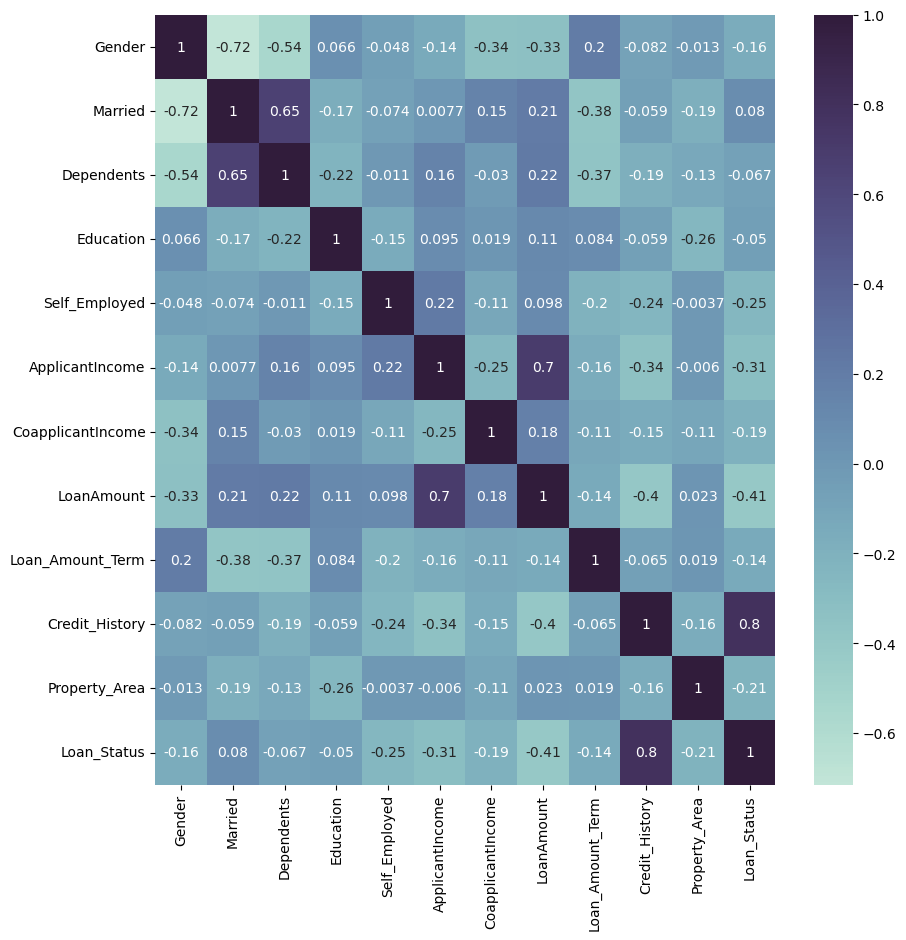

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr.corr(), annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

In [18]:
data.corr()[['Loan_Status']]

,Loan_Status
Gender,-0.064504
Married,0.112321
Dependents,0.035428
Education,0.068437
Self_Employed,-0.034715
ApplicantIncome,-0.043152
CoapplicantIncome,-0.049020
LoanAmount,-0.071753
Loan_Amount_Term,-0.007798
Credit_History,0.529390


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
X = data[['Gender',	'Married',	'Dependents',	'Education',	'Self_Employed',	'ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term',	'Credit_History',	'Property_Area']]
y = data.Loan_Status

In [21]:
selector = SelectKBest(score_func=chi2, k=8) 
X_selected = selector.fit_transform(X, y)
scores = selector.scores_
print("Selected features:", X.columns[selector.get_support()]) 
print("Scores:", scores) 

Selected features: Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History'],
      dtype='object')
Scores: [1.63935692e+00 2.13210084e+00 8.06228464e-01 4.54314045e-01
 4.98919511e-01 5.34219484e+03 4.98830718e+03 1.10437160e+02
 3.62100083e-01 1.96177459e+01 2.90640346e-01]


In [22]:
top_scores = [] 
for a,b in zip(selector.feature_names_in_,scores):
    top_scores.append([a,b])
    print(a,b)

Gender 1.6393569248710735
Married 2.1321008375205883
Dependents 0.8062284643246564
Education 0.4543140453990135
Self_Employed 0.49891951096770315
ApplicantIncome 5342.194843506329
CoapplicantIncome 4988.307181872443
LoanAmount 110.43716043578632
Loan_Amount_Term 0.36210008315119857
Credit_History 19.6177458681132
Property_Area 0.2906403462058903


In [23]:
top_scores.sort(key=lambda x:-x[1])

In [24]:
top_scores

[['ApplicantIncome', 5342.194843506329],
 ['CoapplicantIncome', 4988.307181872443],
 ['LoanAmount', 110.43716043578632],
 ['Credit_History', 19.6177458681132],
 ['Married', 2.1321008375205883],
 ['Gender', 1.6393569248710735],
 ['Dependents', 0.8062284643246564],
 ['Self_Employed', 0.49891951096770315],
 ['Education', 0.4543140453990135],
 ['Loan_Amount_Term', 0.36210008315119857],
 ['Property_Area', 0.2906403462058903]]

In [25]:
X_selected.shape

(480, 8)

## PCA Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA

In [27]:
X.shape

(480, 11)

In [28]:
pca = PCA(n_components=5)
reduced_X = pca.fit_transform(X)

In [29]:
reduced_X.shape

(480, 5)

## Machine Leaning Model 

### Decision Trees
Random Forest
LogisticRegression
Gradient Boosting Machines GBM
Support Vector Machines SVM
Neural Networks

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, log_loss

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=123)

In [54]:
# X_train.columns

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
# 9 x 3 x 5 = 135

param_grid = {
    "max_depth": [3,4,5,6,7,8,10,12,14],
    "min_samples_leaf": [10, 15, 20]
}
cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 14],
                         'min_samples_leaf': [10, 15, 20]})

In [79]:
y_pred = cv.predict(X_test)

In [80]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(log_loss(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.78125
0.8467153284671532
7.884549178869378
0.7194444444444444


In [59]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

## Randomforest 

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=3, random_state = 10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=10)

In [61]:
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.78125

In [62]:
param_grid = {
    "n_estimators": [50, 100, 125, 150],
    "max_depth": [3,4,5,6,7,8,10,12,14],
}
cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 14],
                         'n_estimators': [50, 100, 125, 150]})

In [63]:
y_pred = cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.78125

In [64]:
cv.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=50)

## GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier(n_estimators=50,max_depth=3)
gbt_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [66]:
from sklearn.metrics import accuracy_score
y_pred = gbt_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7604166666666666

In [67]:
param_grid = {
    "n_estimators": [50, 100, 125, 150],
    "max_depth": [3,4,5,6,7,8,10,12,14],
}
cv = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 14],
                         'n_estimators': [50, 100, 125, 150]})

In [68]:
y_pred = cv.predict(X_test)
accuracy_score(y_test,y_pred)

0.7604166666666666

In [69]:
cv.best_estimator_

GradientBoostingClassifier(n_estimators=50)

## LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

C:\Users\T630905\AppData\Local\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [71]:
from sklearn.metrics import accuracy_score
y_pred = lr_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.78125

## Support Vector Machines

In [72]:
from sklearn.svm import SVC
svm_model = SVC(C=1,gamma='auto')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [73]:
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.625

## MLPClassifier

In [74]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [75]:
y_pred = mlp_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.4479166666666667

In [81]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [82]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(cv, pickle_out)
pickle_out.close()

In [83]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [84]:
%%writefile app.py
import pickle
import streamlit as st
# loading the trained model
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)
@st.cache_data()
# defining the function which will make the prediction using the data which the user inputs
def prediction(Gender, Married, Dependents, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History):  
   # Pre-processing user input    
   if Gender == "Male":
       Gender = 0
   else:
       Gender = 1
   if Married == "Unmarried":
       Married = 0
   else:
       Married = 1
   if Self_Employed == "No":
       Self_Employed =0
   else:
       Self_Employed = 1
   if Credit_History == "Unclear Debts":
       Credit_History = 0
   else:
       Credit_History = 1  
   LoanAmount = LoanAmount / 1000 

   # Making predictions
   prediction = classifier.predict(
       [[Gender, Married, Dependents, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History]])
   if prediction == 0:
       pred = 'Rejected'
   else:
       pred = 'Approved'
   return pred

# this is the main function in which we define our webpage  
def main():      
   # front end elements of the web page
   html_temp = """
<div style ="background-color:blue;padding:13px">
<h1 style ="color:orange;text-align:center;">Streamlit Loan Prediction ML App</h1>
</div>
   """
   # display the front end aspect
   st.markdown(html_temp, unsafe_allow_html = True)
   # following lines create boxes in which user can enter data required to make prediction
   Gender = st.selectbox('Gender',("Male","Female"))
   Married = st.selectbox('Marital Status',("Unmarried","Married"))
   Dependents = st.number_input('Dependents')
   Self_Employed = st.selectbox('Self_Employed', ("Yes","No"))
   ApplicantIncome = st.number_input("Applicants monthly income")
   CoapplicantIncome = st.number_input('CoapplicantIncome')
   LoanAmount = st.number_input("Total loan amount")
   Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
   result =""
   # when 'Predict' is clicked, make the prediction and store it
   if st.button("Predict"):
       result = prediction(Gender, Married, Dependents, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History)
       if result == 'Rejected':
           st.error('Your loan is {}'.format(result))
       else:
           st.success('Your loan is {}'.format(result))
       print(LoanAmount)
if __name__=='__main__':
   main()

Overwriting app.py
